In [1]:
!pip install pandas

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
import os

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_dir = '/content/drive/MyDrive/vegetables'

!ls "/content/drive/MyDrive/vegetables"

bahan  latih  validasi


In [5]:
bahan_dir = os.path.join(base_dir, 'bahan')

train_dir = os.path.join(base_dir, 'latih')

validation_dir = os.path.join(base_dir, 'validasi')

In [6]:
Cabbage_dir = os.path.join(bahan_dir, 'Cabbage/')

Broccoli_dir = os.path.join(bahan_dir, 'Broccoli/')

Brinjal_dir = os.path.join(bahan_dir, 'Brinjal/')

Bean_dir = os.path.join(bahan_dir, 'Bean/')

print("Jumlah Data Train Tiap Kelas")
print('Jumlah gambar Cabbage :', len(os.listdir(Cabbage_dir)))
print('Jumlah gambar Broccoli :', len(os.listdir(Broccoli_dir)))
print('Jumlah gambar Brinjal :', len(os.listdir(Brinjal_dir)))
print('Jumlah gambar Bean :', len(os.listdir(Bean_dir)))

Jumlah Data Train Tiap Kelas
Jumlah gambar Cabbage : 139
Jumlah gambar Broccoli : 200
Jumlah gambar Brinjal : 200
Jumlah gambar Bean : 200


In [7]:
train_Cabbage = os.path.join(train_dir, 'Cabbage/')

train_Broccoli = os.path.join(train_dir, 'Broccoli/')

train_Brinjal = os.path.join(train_dir, 'Brinjal/')

train_Bean = os.path.join(train_dir, 'Bean/')

validation_Cabbage = os.path.join(validation_dir, 'Cabbage/')

validation_Broccoli = os.path.join(validation_dir, 'Broccoli/')

validation_Brinjal = os.path.join(validation_dir, 'Brinjal/')

validation_Bean = os.path.join(validation_dir, 'Bean/')

In [8]:
import random
import os
from shutil import copyfile

def train_val_split(source, train, val, train_ratio):

    total_size = len(os.listdir(source))
    print(f'Total size: {total_size}')

    train_size = int(train_ratio * total_size)
    val_size = total_size - train_size

    randomized = random.sample(os.listdir(source), total_size)

    train_files = randomized[:train_size]
    val_files = randomized[train_size:]

    os.makedirs(train, exist_ok=True)
    os.makedirs(val, exist_ok=True)

    clear_folder(train)
    clear_folder(val)

    for i in train_files:
        i_file = os.path.join(source, i)
        destination = os.path.join(train, i)
        if not os.path.exists(destination):
            copyfile(i_file, destination)

    for i in val_files:
        i_file = os.path.join(source, i)
        destination = os.path.join(val, i)
        if not os.path.exists(destination):
            copyfile(i_file, destination)

def clear_folder(folder):
    for file in os.listdir(folder):
        file_path = os.path.join(folder, file)
        if os.path.isfile(file_path):
            os.remove(file_path)

train_ratio = 0.9

source_00 = Cabbage_dir
train_00 = train_Cabbage
val_00 = validation_Cabbage
train_val_split(source_00, train_00, val_00, train_ratio)

source_01 = Broccoli_dir
train_01 = train_Broccoli
val_01 = validation_Broccoli
train_val_split(source_01, train_01, val_01, train_ratio)

source_02 = Brinjal_dir
train_02 = train_Brinjal
val_02 = validation_Brinjal
train_val_split(source_02, train_02, val_02, train_ratio)

source_03 = Bean_dir
train_03 = train_Bean
val_03 = validation_Bean
train_val_split(source_03, train_03, val_03, train_ratio)

Total size: 139
Total size: 200
Total size: 200
Total size: 200


In [9]:
print('Jumlah All Cabbage   :', len(os.listdir(Cabbage_dir)))
print('Jumlah Train Cabbage :', len(os.listdir(train_Cabbage)))
print('Jumlah Val Cabbage   :', len(os.listdir(validation_Cabbage)))

Jumlah All Cabbage   : 139
Jumlah Train Cabbage : 125
Jumlah Val Cabbage   : 14


In [10]:
import tensorflow as tf

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen = ImageDataGenerator(
                    rescale= 1./255,
                    rotation_range= 30,
                    horizontal_flip= True,
                    shear_range = 0.3,
                    fill_mode = 'nearest',
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    zoom_range = 0.1
)

val_datagen = ImageDataGenerator(
                    rescale= 1./255,
                    rotation_range= 30,
                    horizontal_flip= True,
                    shear_range = 0.3,
                    fill_mode = 'nearest',
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    zoom_range = 0.1
)

In [12]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size = (150, 150),
        batch_size = 10,
        class_mode = 'categorical'
)

val_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size = (150, 150),
        batch_size = 10,
        class_mode = 'categorical'
)

Found 665 images belonging to 4 classes.
Found 74 images belonging to 4 classes.


In [13]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.99):
      print('\nAkurasi mencapai 99%')
      self.model.stop_training = True

callback = myCallback()

In [14]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(200, activation='relu'),

    tf.keras.layers.Dropout(0.3, seed=112),

    tf.keras.layers.Dense(500, activation='relu'),

    tf.keras.layers.Dropout(0.5, seed=112),

    tf.keras.layers.Dense(4, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │     3,699,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       100,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,825,488 (14.59 MB)

 Trainable params: 3,825,488 (14.59 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch = 20,
    epochs = 15,
    validation_data = val_generator,
    validation_steps = 10,
    verbose = 1,
    callbacks = [callback]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 516ms/step - accuracy: 0.2893 - loss: 1.4264 - val_accuracy: 0.5000 - val_loss: 1.3773
Epoch 2/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 459ms/step - accuracy: 0.3317 - loss: 1.3726 - val_accuracy: 0.3108 - val_loss: 1.3422
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 479ms/step - accuracy: 0.3102 - loss: 1.3470 - val_accuracy: 0.4459 - val_loss: 1.2461
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.3052 - loss: 1.3744 - val_accuracy: 0.2973 - val_loss: 1.3594
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 335ms/step - accuracy: 0.3767 - loss: 1.3205 - val_accuracy: 0.3108 - val_loss: 1.4522
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 525ms/step - accuracy: 0.3061 - loss: 1.4057 - val_accuracy: 0.4054 - val_loss: 1.2596
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 527ms/step - accuracy: 0.3421 - loss: 1.3018 - val_accuracy: 0.2703 - val_loss: 1.3837
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step - accuracy: 0.3692 - loss: 1.3277 - val_accuracy: 0.2703 - val_loss: 1.4144
Epoch 9/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 329ms/step - accuracy: 0.2252 - loss: 1.4137 - val_accuracy: 0.3108 - 

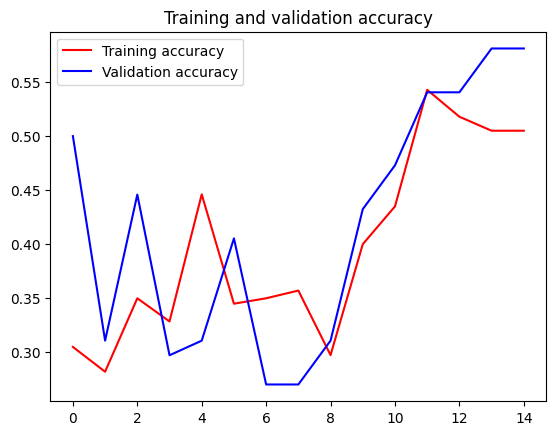

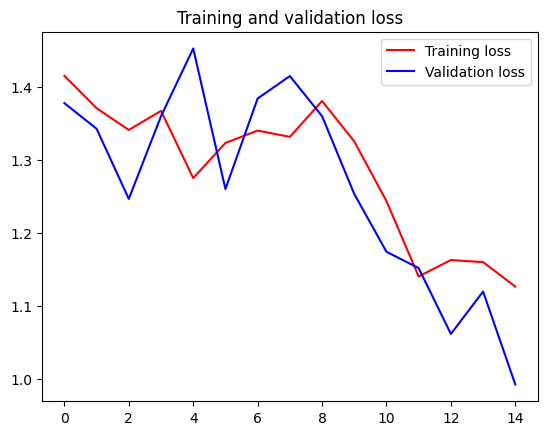

In [18]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc = 'best')
plt.show()

Saving 1006.jpg to 1006.jpg


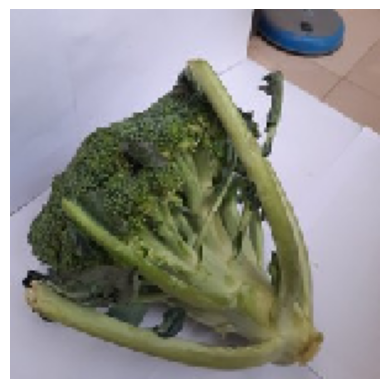

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Nama file: 1006.jpg
This image belongs to class: Broccoli


In [19]:
import numpy as np
from keras.preprocessing import image
from google.colab import files
import os
import matplotlib.pyplot as plt

uploaded = files.upload()

inv_class_indices = {v: k for k, v in train_generator.class_indices.items()}

for fn in uploaded.keys():

    path = fn
    img = image.load_img(path, target_size=(150, 150))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.0

    prediction = model.predict(x)
    predicted_class_index = np.argmax(prediction[0])
    predicted_class_label = inv_class_indices[predicted_class_index]

    print(f"Nama file: {fn}")
    print(f"This image belongs to class: {predicted_class_label}")